In [1]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

[ Info: Precompiling Nevanlinna [0b21cfa8-e591-48a4-a07b-a9d20be7c264]


In [2]:
# Set work data Type
T = BigFloat
setprecision(2048)
;

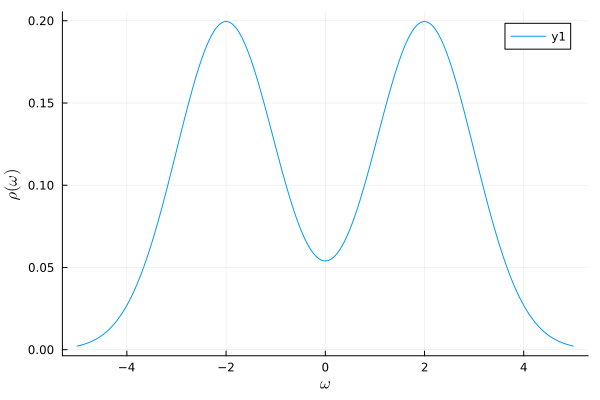

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
#rho(omega) = gaussian(omega, 0.0, 1.0)
rho(omega) = 0.5*gaussian(omega, 2.0, 1.0) + 0.5*gaussian(omega, -2.0, 1.0)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
#moments = Complex{T}.([1, 0, 1, 0, 3, 0, 15, 0, 105, 0, 945])
#moments = Complex{T}.([1, 0, 1])
#moments = Complex{T}.([1])

moments = Complex{T}.([1, 0, 5, 0, 43, 0, 499, 0, 7193, 0, 123109, 0, 2430355, 0, 54229907])
#moments = Complex{T}.([1, 0, 5, 0, 43])

15-element Vector{Complex{BigFloat}}:
           1.0 + 0.0im
           0.0 + 0.0im
           5.0 + 0.0im
           0.0 + 0.0im
          43.0 + 0.0im
           0.0 + 0.0im
         499.0 + 0.0im
           0.0 + 0.0im
        7193.0 + 0.0im
           0.0 + 0.0im
      123109.0 + 0.0im
           0.0 + 0.0im
  2.430355e+06 + 0.0im
           0.0 + 0.0im
 5.4229907e+07 + 0.0im

In [8]:
wo_ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

Rank of Hankel matrix:8
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 27


In [9]:
ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=true)
;

Rank of Hankel matrix:8
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 27
H=1
Iter     Function value   Gradient norm 
     0     7.035248e-01     2.037158e+00
 * time: 0.019132137298583984
     1     4.704503e-01     1.026207e+00
 * time: 3.8864970207214355
     2     4.315597e-01     7.920544e-01
 * time: 5.23258900642395
     3     3.219610e-01     2.055971e-01
 * time: 7.277156114578247
     4     3.147460e-01     5.018473e-02
 * time: 9.351803064346313
     5     3.145525e-01     2.420039e-02
 * time: 10.7552011013031
     6     3.145072e-01     2.160859e-03
 * time: 12.620979070663452
     7     3.145070e-01     1.291286e-04
 * time: 14.326980113983154
     8     3.145070e-01     2.464936e-05
 * time: 16.488654136657715
     9     3.145070e-01     1.264136e-05
 * time: 18.547197103500366
    10     3.145070e-01     4.663861e-06
 * time: 19.954379081726074
    11     3.145070e-01     1.121733e-06
 * time: 21.31964921951294
    12    

In [10]:
Nevanlinna.solve!(ham_nev_sol)

H=1
Iter     Function value   Gradient norm 
     0     3.145070e-01     5.694382e-09
 * time: 0.00019598007202148438
max_theta=0.213856325229896108912439902866501427064673269372201044500556834932402532773381279024912590402655913450040173286491240626664127086707015276255548776986970830902795526581598328817975543879054630177908635230748539080480180014720717975653330413505429456904266466741300322661597460459378214654241341937846850394733731181492435923725422691150752806740791613285402654573308209344370685838628945068840530621217977989175012926666135137996801183249318491873661238081845150130391517656968221843204724911553083806763823434174474122719689641822877290155207664081610737009987504102429165393423942157649546327126151831601425692084589
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     3.145070e-01     1.366964e+00
 * time: 0.0002129077911376953
     1     2.235572e-01     6.535774e-01
 * time: 2.1096818447113037
     2     1.397851e-01     6.682

    21     2.735077e-03     6.090859e-09
 * time: 34.07882308959961
max_theta=0.422060322902033001267842793470535625695896009700968007549919001074603697843331207385648169597394387883700409228344390675066564025013529271694430952854102953345172385396684972944084082718154463179756699096833790705651414681677153729668553849061957232989121412804029163183039796764658192338346465472461086784264498118658928834758271717009662911893891792830766867351125304356125730438671302275886155269278166213669259460716503269984254608537977983227840756862576860920111006880384684826713602241756519778080527862898330845861692110123863922438236032792890750974098687416575305081604589106571403198235809404850899672047936
hardy optimization was success.
H=6
Iter     Function value   Gradient norm 
     0     2.735077e-03     5.221735e-02
 * time: 0.00022602081298828125
     1     2.470755e-03     4.682535e-02
 * time: 1.4483489990234375
     2     2.289624e-03     2.770928e-02
 * time: 2.7580161094665527
     3     2.

    25     1.315207e-04     3.171776e-03
 * time: 49.57840299606323
    26     1.305698e-04     3.371220e-03
 * time: 52.281681060791016
    27     1.291475e-04     2.314556e-03
 * time: 54.312841176986694
    28     1.282688e-04     4.175589e-04
 * time: 56.40762114524841
    29     1.282229e-04     2.762844e-04
 * time: 57.82805919647217
    30     1.282144e-04     5.309310e-05
 * time: 59.794013023376465
    31     1.282140e-04     2.128999e-05
 * time: 61.881532192230225
    32     1.282140e-04     7.280228e-06
 * time: 63.24331712722778
    33     1.282140e-04     2.275135e-06
 * time: 64.61149621009827
    34     1.282140e-04     1.268200e-06
 * time: 67.27935314178467
    35     1.282140e-04     4.725468e-07
 * time: 68.60566210746765
    36     1.282140e-04     1.866710e-07
 * time: 69.97082114219666
    37     1.282140e-04     8.188468e-08
 * time: 71.3657341003418
    38     1.282140e-04     3.521340e-08
 * time: 72.81158208847046
    39     1.282140e-04     1.417227e-08
 * t

    35     2.931067e-05     1.131910e-04
 * time: 72.54205417633057
    36     2.930893e-05     1.722375e-04
 * time: 74.93744707107544
    37     2.930610e-05     2.286518e-04
 * time: 77.1559271812439
    38     2.930153e-05     3.123698e-04
 * time: 79.41946411132812
    39     2.929397e-05     4.167974e-04
 * time: 82.21862721443176
    40     2.928130e-05     5.530082e-04
 * time: 84.56102013587952
    41     2.926051e-05     7.269700e-04
 * time: 86.84460711479187
    42     2.922555e-05     9.362789e-04
 * time: 89.39447903633118
    43     2.916593e-05     1.168023e-03
 * time: 91.81991720199585
    44     2.905990e-05     1.375074e-03
 * time: 93.96118903160095
    45     2.885852e-05     1.302976e-03
 * time: 96.2302520275116
    46     2.857024e-05     4.595963e-04
 * time: 99.06329202651978
    47     2.854182e-05     2.611485e-04
 * time: 100.52549004554749
    48     2.853214e-05     7.867727e-05
 * time: 101.99680709838867
    49     2.853147e-05     4.302653e-05
 * time

     1     1.812559e-05     1.320298e-03
 * time: 1.6219570636749268
     2     1.805991e-05     7.724673e-04
 * time: 3.5539519786834717
     3     1.801196e-05     7.354153e-04
 * time: 5.336544036865234
     4     1.793048e-05     6.201407e-04
 * time: 6.930461883544922
     5     1.782692e-05     6.588732e-04
 * time: 8.49328899383545
     6     1.771705e-05     5.775417e-04
 * time: 10.128571033477783
     7     1.759850e-05     5.338181e-04
 * time: 12.100767850875854
     8     1.746409e-05     4.001828e-04
 * time: 13.873341083526611
     9     1.735571e-05     4.233149e-04
 * time: 15.434710025787354
    10     1.726254e-05     3.045073e-04
 * time: 16.983734846115112
    11     1.717054e-05     2.508384e-04
 * time: 18.553026914596558
    12     1.710160e-05     2.700517e-04
 * time: 20.217170000076294
    13     1.699944e-05     2.262882e-04
 * time: 23.185024976730347
    14     1.690720e-05     2.515725e-04
 * time: 25.488144874572754
    15     1.675153e-05     2.053986e-

    18     1.373458e-05     3.105137e-04
 * time: 33.83121109008789
    19     1.367501e-05     7.673468e-05
 * time: 36.69710898399353
    20     1.367058e-05     6.125184e-05
 * time: 39.29220795631409
    21     1.366724e-05     6.385772e-05
 * time: 41.71544790267944
    22     1.365973e-05     1.287172e-04
 * time: 44.23491096496582
    23     1.365560e-05     2.593641e-05
 * time: 46.71337890625
    24     1.365288e-05     6.581255e-05
 * time: 50.49881196022034
    25     1.364963e-05     4.636616e-05
 * time: 52.87977600097656
    26     1.364663e-05     1.235633e-04
 * time: 55.30075001716614
    27     1.361185e-05     5.524926e-04
 * time: 58.55865502357483
    28     1.357541e-05     4.169315e-04
 * time: 61.11738586425781
    29     1.352090e-05     5.611237e-04
 * time: 64.15254402160645
    30     1.345473e-05     5.438223e-04
 * time: 66.56916093826294
    31     1.340167e-05     5.585028e-04
 * time: 69.0069088935852
    32     1.335745e-05     4.088241e-04
 * time: 71

    27     1.253864e-05     4.976294e-05
 * time: 57.1985969543457
    28     1.253723e-05     5.710191e-05
 * time: 60.163049936294556
    29     1.253670e-05     2.512906e-05
 * time: 61.756377935409546
    30     1.253641e-05     2.335873e-05
 * time: 64.3624529838562
    31     1.253614e-05     2.937223e-05
 * time: 66.8598518371582
    32     1.253533e-05     1.216357e-05
 * time: 69.88675904273987
    33     1.253348e-05     1.006444e-04
 * time: 72.29716086387634
    34     1.253254e-05     8.555969e-05
 * time: 74.00320100784302
    35     1.252974e-05     1.601205e-04
 * time: 76.473317861557
    36     1.252771e-05     1.589259e-04
 * time: 78.1469669342041
    37     1.252128e-05     2.965963e-04
 * time: 81.11190485954285
    38     1.251690e-05     2.776053e-04
 * time: 82.7064700126648
    39     1.250669e-05     3.759280e-04
 * time: 85.08954000473022
    40     1.249892e-05     3.887000e-04
 * time: 86.73975992202759
    41     1.247989e-05     4.499915e-04
 * time: 89.

H=15
Iter     Function value   Gradient norm 
     0     1.218971e-05     4.011576e-04
 * time: 0.0003249645233154297
     1     1.218380e-05     2.690487e-04
 * time: 2.183030843734741
     2     1.218147e-05     1.536130e-04
 * time: 4.78999400138855
     3     1.218013e-05     1.407894e-04
 * time: 7.124802827835083
     4     1.217784e-05     1.063291e-04
 * time: 9.380462884902954
     5     1.217534e-05     1.469769e-04
 * time: 11.38050103187561
     6     1.217254e-05     9.527427e-05
 * time: 13.292961835861206
     7     1.216906e-05     1.065773e-04
 * time: 15.020388841629028
     8     1.216507e-05     1.043529e-04
 * time: 16.80742597579956
     9     1.216136e-05     1.020968e-04
 * time: 18.95377492904663
    10     1.215737e-05     8.477675e-05
 * time: 20.95370101928711
    11     1.215253e-05     7.308554e-05
 * time: 22.704065799713135
    12     1.214872e-05     5.953016e-05
 * time: 24.357159852981567
    13     1.214480e-05     6.632862e-05
 * time: 26.1254689693

   119     1.195715e-05     3.614503e-05
 * time: 285.43614888191223
   120     1.195712e-05     3.749336e-05
 * time: 287.09145498275757
   121     1.195708e-05     4.512654e-05
 * time: 289.62214398384094
   122     1.195705e-05     4.678579e-05
 * time: 291.399582862854
   123     1.195698e-05     5.614153e-05
 * time: 294.0592420101166
   124     1.195693e-05     5.816967e-05
 * time: 295.86032700538635
   125     1.195683e-05     6.955739e-05
 * time: 298.58531188964844
   126     1.195674e-05     7.201361e-05
 * time: 300.4236099720001
   127     1.195659e-05     8.572001e-05
 * time: 303.8567099571228
   128     1.195646e-05     8.865295e-05
 * time: 305.55877590179443
   129     1.195622e-05     1.048157e-04
 * time: 308.0972409248352
   130     1.195601e-05     1.082282e-04
 * time: 309.8101599216461
   131     1.195561e-05     1.264178e-04
 * time: 312.78455901145935
   132     1.195528e-05     1.301165e-04
 * time: 315.43445086479187
   133     1.195457e-05     1.475162e-04


    70     1.189111e-05     1.153824e-04
 * time: 191.03361415863037
    71     1.188977e-05     4.292257e-05
 * time: 194.17139315605164
    72     1.188877e-05     3.632058e-05
 * time: 197.35963106155396
    73     1.188858e-05     1.158709e-05
 * time: 200.65705013275146
    74     1.188851e-05     3.974484e-06
 * time: 204.1894280910492
    75     1.188851e-05     3.954080e-06
 * time: 207.16580319404602
    76     1.188849e-05     5.807581e-06
 * time: 209.94990515708923
    77     1.188848e-05     7.653482e-06
 * time: 211.89680099487305
    78     1.188846e-05     1.254276e-05
 * time: 216.2222499847412
    79     1.188843e-05     1.253871e-05
 * time: 218.78345203399658
    80     1.188841e-05     1.708927e-05
 * time: 220.84214520454407
    81     1.188839e-05     1.838919e-05
 * time: 222.81630301475525
    82     1.188835e-05     2.429752e-05
 * time: 226.29488015174866
    83     1.188832e-05     2.635923e-05
 * time: 228.80005407333374
    84     1.188827e-05     3.315817

H=17
Iter     Function value   Gradient norm 
     0     1.184190e-05     1.543353e-04
 * time: 0.00019693374633789062
     1     1.184117e-05     9.925197e-05
 * time: 1.8879458904266357
     2     1.184086e-05     5.198085e-05
 * time: 4.3352320194244385
     3     1.184071e-05     5.480154e-05
 * time: 6.453779935836792
     4     1.184045e-05     3.740665e-05
 * time: 8.561114072799683
     5     1.184019e-05     5.322146e-05
 * time: 10.903212070465088
     6     1.183990e-05     3.421682e-05
 * time: 12.770732879638672
     7     1.183957e-05     3.551405e-05
 * time: 15.119389057159424
     8     1.183922e-05     3.973890e-05
 * time: 17.10599994659424
     9     1.183887e-05     3.412112e-05
 * time: 18.919034957885742
    10     1.183845e-05     3.981181e-05
 * time: 20.769223928451538
    11     1.183798e-05     3.102133e-05
 * time: 22.590435028076172
    12     1.183753e-05     3.074377e-05
 * time: 24.599418878555298
    13     1.183701e-05     2.391537e-05
 * time: 27.009

   119     1.181501e-05     1.527380e-04
 * time: 311.27734899520874
   120     1.181229e-05     1.749229e-04
 * time: 314.34538197517395
   121     1.180517e-05     1.288839e-04
 * time: 319.39860105514526
   122     1.180348e-05     1.155492e-04
 * time: 321.19696497917175
   123     1.180220e-05     6.276835e-05
 * time: 323.0944619178772
   124     1.180181e-05     2.874771e-05
 * time: 325.1010410785675
   125     1.180173e-05     1.657263e-05
 * time: 327.27463603019714
   126     1.180168e-05     1.903845e-05
 * time: 331.0011749267578
   127     1.180165e-05     1.196592e-05
 * time: 332.83136200904846
   128     1.180163e-05     8.818293e-06
 * time: 334.7006869316101
   129     1.180162e-05     5.064613e-06
 * time: 336.83970403671265
   130     1.180162e-05     4.077613e-06
 * time: 339.0263068675995
   131     1.180162e-05     3.070119e-06
 * time: 341.71892786026
   132     1.180162e-05     2.258501e-06
 * time: 343.5567739009857
   133     1.180162e-05     1.137958e-06
 *

   239     1.179891e-05     1.095699e-07
 * time: 594.3805959224701
   240     1.179891e-05     7.903933e-08
 * time: 596.366091966629
   241     1.179891e-05     6.218475e-08
 * time: 598.2377049922943
   242     1.179891e-05     4.001605e-08
 * time: 600.0863819122314
   243     1.179891e-05     3.083567e-08
 * time: 602.3180410861969
   244     1.179891e-05     2.167234e-08
 * time: 604.1762568950653
   245     1.179891e-05     1.572026e-08
 * time: 605.9048550128937
   246     1.179891e-05     1.200896e-08
 * time: 607.6078629493713
   247     1.179891e-05     8.265366e-09
 * time: 609.4096059799194
max_theta=0.58773253590428085456034371828380402895924101322880544713468196596343327441395427843301620706805772663631715502306688054898016855274576526820321513850048972211766813323112563513788797531086019654770973805228304477274349707985197296123045742289248004668363664049244632849779406970213434565383324218931358805112200109045295921788170594809516105035247880844548772027577495257513500

   101     1.179379e-05     2.133158e-05
 * time: 249.21665787696838
   102     1.179376e-05     2.311857e-05
 * time: 251.82317280769348
   103     1.179375e-05     2.226876e-05
 * time: 253.64062881469727
   104     1.179372e-05     3.210408e-05
 * time: 256.33909487724304
   105     1.179370e-05     3.193003e-05
 * time: 258.1502969264984
   106     1.179365e-05     3.568887e-05
 * time: 261.4884669780731
   107     1.179362e-05     3.478639e-05
 * time: 263.22941279411316
   108     1.179354e-05     4.540714e-05
 * time: 265.94109082221985
   109     1.179350e-05     4.519726e-05
 * time: 267.953950881958
   110     1.179338e-05     5.094585e-05
 * time: 270.68191385269165
   111     1.179330e-05     5.149469e-05
 * time: 272.56177282333374
   112     1.179310e-05     5.567344e-05
 * time: 275.4280858039856
   113     1.179289e-05     5.845580e-05
 * time: 278.7324068546295
   114     1.179217e-05     4.894344e-05
 * time: 281.6105968952179
   115     1.179185e-05     5.341473e-05


   221     1.178779e-05     9.289265e-08
 * time: 501.507465839386
   222     1.178779e-05     3.366182e-08
 * time: 503.27850890159607
   223     1.178779e-05     4.161103e-08
 * time: 506.52120780944824
   224     1.178779e-05     1.732414e-08
 * time: 508.3018288612366
   225     1.178779e-05     2.316421e-08
 * time: 511.3490378856659
   226     1.178779e-05     6.728768e-09
 * time: 513.183748960495
max_theta=0.5930415002740257327458716591582595481381209474097712333961194965493434918333969629641576975316278715338214764613188827399221167952044858132536643383385952574773651582028241727737423195300140962153411088782262790705088436172869705814680564658578152073661164386955399146034053447940501609551562065469529089132662253071486917078453617659261759427431666429001384991471859245203962482214839357909893345023008742598179081922313038638144908976098376195184844331660635896358371170609047674963995283772740628466547672347531054235532680527998660926844052355532268002497501717410386725822581

   104     1.178565e-05     3.786427e-06
 * time: 259.7957389354706
   105     1.178565e-05     3.608026e-06
 * time: 261.56930708885193
   106     1.178565e-05     3.997752e-06
 * time: 264.4241409301758
   107     1.178565e-05     3.702224e-06
 * time: 266.2471969127655
   108     1.178565e-05     5.694915e-06
 * time: 269.5632939338684
   109     1.178565e-05     5.536518e-06
 * time: 271.346638917923
   110     1.178565e-05     5.971409e-06
 * time: 274.2316300868988
   111     1.178565e-05     5.605908e-06
 * time: 276.2247030735016
   112     1.178564e-05     8.242063e-06
 * time: 279.7602710723877
   113     1.178564e-05     8.070826e-06
 * time: 281.5399680137634
   114     1.178564e-05     9.129390e-06
 * time: 284.2195839881897
   115     1.178564e-05     8.663692e-06
 * time: 286.1711459159851
   116     1.178563e-05     1.176510e-05
 * time: 288.9209280014038
   117     1.178563e-05     1.136611e-05
 * time: 290.7694709300995
   118     1.178562e-05     1.395476e-05
 * time

H=20
Iter     Function value   Gradient norm 
     0     1.178345e-05     5.910247e-05
 * time: 0.00020694732666015625
     1     1.178335e-05     3.822430e-05
 * time: 1.833765983581543
     2     1.178330e-05     2.427413e-05
 * time: 3.6920220851898193
     3     1.178328e-05     2.766939e-05
 * time: 5.6548449993133545
     4     1.178324e-05     1.771937e-05
 * time: 8.410309076309204
     5     1.178318e-05     2.236849e-05
 * time: 10.392959117889404
     6     1.178313e-05     2.069276e-05
 * time: 12.342456102371216
     7     1.178305e-05     2.198002e-05
 * time: 14.148869037628174
     8     1.178296e-05     2.906274e-05
 * time: 16.050780057907104
     9     1.178286e-05     2.614958e-05
 * time: 18.02611804008484
    10     1.178276e-05     2.867383e-05
 * time: 20.75704002380371
    11     1.178262e-05     2.535655e-05
 * time: 22.568485975265503
    12     1.178245e-05     2.823049e-05
 * time: 24.54853391647339
    13     1.178226e-05     2.527777e-05
 * time: 26.50829

   119     1.177382e-05     2.257750e-06
 * time: 302.55401492118835
   120     1.177382e-05     2.029825e-06
 * time: 304.8254051208496
   121     1.177382e-05     2.616369e-06
 * time: 308.66465997695923
   122     1.177382e-05     2.397378e-06
 * time: 311.85638213157654
   123     1.177382e-05     3.017201e-06
 * time: 315.118793964386
   124     1.177382e-05     2.808025e-06
 * time: 317.48607206344604
   125     1.177382e-05     3.433218e-06
 * time: 320.8559648990631
   126     1.177382e-05     3.225780e-06
 * time: 323.1819360256195
   127     1.177382e-05     3.893297e-06
 * time: 327.3161709308624
   128     1.177382e-05     3.697704e-06
 * time: 329.45978808403015
   129     1.177382e-05     4.407473e-06
 * time: 332.6425750255585
   130     1.177382e-05     4.213503e-06
 * time: 335.10181403160095
   131     1.177382e-05     4.952227e-06
 * time: 338.49445700645447
   132     1.177382e-05     4.752026e-06
 * time: 340.73393201828003
   133     1.177381e-05     5.539080e-06


   240     1.177223e-05     1.993176e-05
 * time: 642.2671399116516
   241     1.177221e-05     2.386613e-05
 * time: 645.2753329277039
   242     1.177220e-05     2.254397e-05
 * time: 647.8604640960693
   243     1.177217e-05     2.821479e-05
 * time: 651.0205481052399
   244     1.177215e-05     2.717530e-05
 * time: 653.1707489490509
   245     1.177211e-05     3.175884e-05
 * time: 656.1501429080963
   246     1.177209e-05     3.019622e-05
 * time: 658.1886470317841
   247     1.177203e-05     3.813292e-05
 * time: 661.2669849395752
   248     1.177200e-05     3.629146e-05
 * time: 664.0126430988312
   249     1.177193e-05     4.171066e-05
 * time: 666.8141379356384
   250     1.177189e-05     3.950300e-05
 * time: 668.6371290683746
   251     1.177179e-05     5.148822e-05
 * time: 671.4777250289917
   252     1.177174e-05     5.049426e-05
 * time: 673.4197521209717
   253     1.177161e-05     5.724607e-05
 * time: 676.5905439853668
   254     1.177155e-05     5.463549e-05
 * time

   361     1.176635e-05     2.400254e-05
 * time: 954.6970999240875
   362     1.176633e-05     2.309930e-05
 * time: 956.5503239631653
   363     1.176630e-05     2.584943e-05
 * time: 959.3305280208588
   364     1.176629e-05     2.419745e-05
 * time: 961.2171199321747
   365     1.176624e-05     3.174601e-05
 * time: 964.5212490558624
   366     1.176622e-05     3.003044e-05
 * time: 966.8941020965576
   367     1.176616e-05     3.618204e-05
 * time: 969.5854749679565
   368     1.176614e-05     3.458353e-05
 * time: 971.4589099884033
   369     1.176606e-05     4.011628e-05
 * time: 974.4425821304321
   370     1.176603e-05     3.864154e-05
 * time: 977.1861619949341
   371     1.176593e-05     4.371368e-05
 * time: 979.848711013794
   372     1.176589e-05     4.273440e-05
 * time: 981.7156360149384
   373     1.176577e-05     4.925613e-05
 * time: 984.490128993988
   374     1.176572e-05     4.825571e-05
 * time: 986.383896112442
   375     1.176557e-05     4.984224e-05
 * time: 9

    61     1.176042e-05     9.520222e-06
 * time: 153.2624430656433
    62     1.176040e-05     9.521783e-06
 * time: 155.77391004562378
    63     1.176036e-05     1.158585e-05
 * time: 158.51037001609802
    64     1.176034e-05     1.055090e-05
 * time: 160.40403008460999
    65     1.176032e-05     1.197094e-05
 * time: 163.36571502685547
    66     1.176030e-05     1.156498e-05
 * time: 166.81382703781128
    67     1.176027e-05     1.153904e-05
 * time: 169.5820472240448
    68     1.176020e-05     1.160649e-05
 * time: 173.3705530166626
    69     1.176015e-05     1.377921e-05
 * time: 177.1034550666809
    70     1.175992e-05     2.279537e-05
 * time: 179.88966703414917
    71     1.175982e-05     8.655815e-06
 * time: 181.80914616584778
    72     1.175973e-05     9.262417e-06
 * time: 184.76322722434998
    73     1.175970e-05     3.936435e-06
 * time: 188.3855540752411
    74     1.175966e-05     9.967768e-06
 * time: 191.40242099761963
    75     1.175961e-05     3.712331e-0

   181     1.175623e-05     1.049986e-05
 * time: 465.7034180164337
   182     1.175622e-05     1.191635e-05
 * time: 468.72675013542175
   183     1.175622e-05     1.126672e-05
 * time: 470.7055940628052
   184     1.175622e-05     1.394510e-05
 * time: 474.240159034729
   185     1.175621e-05     1.329532e-05
 * time: 476.2753942012787
   186     1.175620e-05     1.561326e-05
 * time: 478.9361951351166
   187     1.175620e-05     1.502892e-05
 * time: 481.00182604789734
   188     1.175619e-05     1.806962e-05
 * time: 483.8499240875244
   189     1.175618e-05     1.737413e-05
 * time: 486.14009714126587
   190     1.175617e-05     1.965300e-05
 * time: 489.2171561717987
   191     1.175616e-05     1.893174e-05
 * time: 491.0501730442047
   192     1.175614e-05     2.313637e-05
 * time: 493.83640813827515
   193     1.175613e-05     2.208224e-05
 * time: 496.08082604408264
   194     1.175611e-05     2.573412e-05
 * time: 498.9809272289276
   195     1.175610e-05     2.429228e-05
 * 

   302     1.175171e-05     7.539324e-06
 * time: 790.3833301067352
   303     1.175171e-05     7.412453e-06
 * time: 792.6050951480865
   304     1.175171e-05     8.099712e-06
 * time: 795.9478662014008
   305     1.175170e-05     7.966978e-06
 * time: 798.177088022232
   306     1.175170e-05     8.697123e-06
 * time: 802.368499994278
   307     1.175170e-05     8.558254e-06
 * time: 804.5577011108398
   308     1.175170e-05     9.333959e-06
 * time: 807.8619160652161
   309     1.175170e-05     9.188222e-06
 * time: 810.1825652122498
   310     1.175170e-05     1.001349e-05
 * time: 813.7086591720581
   311     1.175170e-05     9.860528e-06
 * time: 816.1442370414734
   312     1.175170e-05     1.073952e-05
 * time: 820.5013840198517
   313     1.175170e-05     1.057900e-05
 * time: 822.7150812149048
   314     1.175169e-05     1.151535e-05
 * time: 826.0219841003418
   315     1.175169e-05     1.134669e-05
 * time: 828.3706111907959
   316     1.175169e-05     1.234400e-05
 * time: 

   422     1.174179e-05     9.101642e-08
 * time: 1139.912302017212
   423     1.174179e-05     7.744293e-08
 * time: 1142.1146461963654
   424     1.174179e-05     1.055698e-07
 * time: 1145.621211051941
   425     1.174179e-05     9.299062e-08
 * time: 1147.9900450706482
   426     1.174179e-05     1.218274e-07
 * time: 1151.6834661960602
   427     1.174179e-05     1.089047e-07
 * time: 1154.8907220363617
   428     1.174179e-05     1.380789e-07
 * time: 1158.3608100414276
   429     1.174179e-05     1.248304e-07
 * time: 1160.5992240905762
   430     1.174179e-05     1.546513e-07
 * time: 1163.9345211982727
   431     1.174179e-05     1.420889e-07
 * time: 1166.2502551078796
   432     1.174179e-05     1.726524e-07
 * time: 1170.5787131786346
   433     1.174179e-05     1.611144e-07
 * time: 1172.7237470149994
   434     1.174179e-05     1.923231e-07
 * time: 1176.0941760540009
   435     1.174179e-05     1.816027e-07
 * time: 1178.4494001865387
   436     1.174179e-05     2.138198

   542     1.174178e-05     8.755736e-06
 * time: 1462.7727530002594
   543     1.174178e-05     8.645582e-06
 * time: 1464.9549131393433
   544     1.174178e-05     9.314192e-06
 * time: 1468.25439119339
   545     1.174178e-05     9.197245e-06
 * time: 1470.6143350601196
   546     1.174178e-05     9.908422e-06
 * time: 1474.7892651557922
   547     1.174178e-05     9.784214e-06
 * time: 1476.902957201004
   548     1.174178e-05     1.054083e-05
 * time: 1480.2565791606903
   549     1.174178e-05     1.040885e-05
 * time: 1482.5430810451508
   550     1.174177e-05     1.121398e-05
 * time: 1486.0261671543121
   551     1.174177e-05     1.107371e-05
 * time: 1489.0925800800323
   552     1.174177e-05     1.193066e-05
 * time: 1492.4182732105255
   553     1.174177e-05     1.178153e-05
 * time: 1494.609010219574
   554     1.174177e-05     1.269387e-05
 * time: 1497.9716820716858
   555     1.174177e-05     1.253526e-05
 * time: 1500.218180179596
   556     1.174177e-05     1.350683e-0

     0     1.173332e-05     1.867424e-05
 * time: 0.00019598007202148438
     1     1.173331e-05     1.362360e-05
 * time: 2.05682110786438
     2     1.173330e-05     1.202084e-05
 * time: 3.9279730319976807
     3     1.173329e-05     8.322861e-06
 * time: 5.805711984634399
     4     1.173328e-05     1.329754e-05
 * time: 7.8221211433410645
     5     1.173327e-05     1.283616e-05
 * time: 9.823019027709961
     6     1.173325e-05     1.182197e-05
 * time: 12.417273044586182
     7     1.173323e-05     2.039998e-05
 * time: 14.260854005813599
     8     1.173319e-05     1.973589e-05
 * time: 16.17238998413086
     9     1.173314e-05     2.072907e-05
 * time: 18.05625009536743
    10     1.173308e-05     1.984041e-05
 * time: 19.99568819999695
    11     1.173302e-05     1.882986e-05
 * time: 21.94503116607666
    12     1.173296e-05     1.962659e-05
 * time: 24.00671100616455
    13     1.173290e-05     1.728228e-05
 * time: 26.085023164749146
    14     1.173283e-05     2.022744e-0

   120     1.173156e-05     1.129554e-06
 * time: 319.751757144928
   121     1.173156e-05     1.037778e-06
 * time: 323.4064040184021
   122     1.173156e-05     9.348455e-07
 * time: 327.65861415863037
   123     1.173156e-05     9.162473e-07
 * time: 331.1532711982727
   124     1.173156e-05     7.943132e-07
 * time: 333.3991310596466
   125     1.173156e-05     7.919942e-07
 * time: 336.88308000564575
   126     1.173156e-05     7.206091e-07
 * time: 339.2377610206604
   127     1.173156e-05     9.230471e-07
 * time: 342.8724801540375
   128     1.173156e-05     6.097293e-07
 * time: 345.920921087265
   129     1.173156e-05     8.925046e-07
 * time: 348.4797410964966
   130     1.173156e-05     5.083746e-07
 * time: 350.9623191356659
   131     1.173156e-05     8.623057e-07
 * time: 353.2846620082855
   132     1.173156e-05     3.994370e-07
 * time: 355.53469800949097
   133     1.173156e-05     6.795147e-07
 * time: 357.89443802833557
   134     1.173156e-05     3.036411e-07
 * ti

   241     1.173153e-05     4.616308e-06
 * time: 593.1646900177002
   242     1.173153e-05     4.653728e-06
 * time: 595.1100521087646
   243     1.173153e-05     4.758851e-06
 * time: 596.9337601661682
   244     1.173153e-05     4.840649e-06
 * time: 598.7690160274506
   245     1.173153e-05     4.896445e-06
 * time: 600.6634750366211
   246     1.173153e-05     5.010219e-06
 * time: 602.5052030086517
   247     1.173153e-05     5.023956e-06
 * time: 604.752387046814
   248     1.173153e-05     5.158883e-06
 * time: 606.7574031352997
   249     1.173153e-05     5.139135e-06
 * time: 608.592856168747
   250     1.173153e-05     5.282787e-06
 * time: 610.381422996521
   251     1.173153e-05     5.240964e-06
 * time: 612.2475090026855
   252     1.173153e-05     5.378183e-06
 * time: 614.7062389850616
   253     1.173153e-05     5.328884e-06
 * time: 616.4978611469269
   254     1.173153e-05     5.440858e-06
 * time: 618.3399500846863
   255     1.173153e-05     5.402995e-06
 * time: 6

   362     1.173146e-05     1.832340e-06
 * time: 830.7622411251068
   363     1.173146e-05     3.111832e-06
 * time: 833.5039210319519
   364     1.173146e-05     2.211671e-06
 * time: 835.6776549816132
   365     1.173146e-05     3.401552e-06
 * time: 838.7646110057831
   366     1.173145e-05     2.544819e-06
 * time: 840.5600039958954
   367     1.173145e-05     3.455554e-06
 * time: 842.399827003479
   368     1.173145e-05     2.735867e-06
 * time: 844.2552781105042
   369     1.173145e-05     3.252325e-06
 * time: 846.6268630027771
   370     1.173145e-05     2.746005e-06
 * time: 848.3970501422882
   371     1.173145e-05     2.867232e-06
 * time: 850.2513720989227
   372     1.173145e-05     2.604658e-06
 * time: 852.0685331821442
   373     1.173145e-05     2.395319e-06
 * time: 853.8776969909668
   374     1.173145e-05     2.369646e-06
 * time: 855.7950820922852
   375     1.173145e-05     1.919221e-06
 * time: 858.0815110206604
   376     1.173145e-05     2.093541e-06
 * time:

   483     1.173144e-05     4.922552e-07
 * time: 1069.284903049469
   484     1.173144e-05     5.523722e-07
 * time: 1071.0746440887451
   485     1.173144e-05     4.935809e-07
 * time: 1072.8763980865479
   486     1.173144e-05     5.454702e-07
 * time: 1074.7866911888123
   487     1.173144e-05     4.896782e-07
 * time: 1076.6497480869293
   488     1.173144e-05     5.320438e-07
 * time: 1078.8951470851898
   489     1.173144e-05     4.810255e-07
 * time: 1080.8727312088013
   490     1.173144e-05     5.134536e-07
 * time: 1082.882565021515
   491     1.173144e-05     4.685465e-07
 * time: 1084.6460020542145
   492     1.173144e-05     4.912600e-07
 * time: 1086.5070860385895
   493     1.173144e-05     4.532944e-07
 * time: 1088.360225200653
   494     1.173144e-05     4.669324e-07
 * time: 1090.8788890838623
   495     1.173144e-05     4.362408e-07
 * time: 1092.6640541553497
   496     1.173144e-05     4.416814e-07
 * time: 1094.4486122131348
   497     1.173144e-05     4.181735e

   603     1.173143e-05     9.224565e-07
 * time: 1302.2134981155396
   604     1.173143e-05     8.732649e-07
 * time: 1303.992474079132
   605     1.173143e-05     9.273671e-07
 * time: 1305.878159046173
   606     1.173143e-05     8.800459e-07
 * time: 1308.3237311840057
   607     1.173143e-05     9.295475e-07
 * time: 1310.0788021087646
   608     1.173143e-05     8.864858e-07
 * time: 1311.8921210765839
   609     1.173143e-05     9.303733e-07
 * time: 1313.7124400138855
   610     1.173143e-05     8.937359e-07
 * time: 1315.5977129936218
   611     1.173143e-05     9.312943e-07
 * time: 1317.8215579986572
   612     1.173143e-05     9.027771e-07
 * time: 1319.8006031513214
   613     1.173143e-05     9.335528e-07
 * time: 1321.6168460845947
   614     1.173143e-05     9.142402e-07
 * time: 1323.4202680587769
   615     1.173143e-05     9.379905e-07
 * time: 1325.315365076065
   616     1.173143e-05     9.283296e-07
 * time: 1328.0050840377808
   617     1.173143e-05     9.449926e

   723     1.173139e-05     8.023917e-06
 * time: 1533.2041230201721
   724     1.173139e-05     7.904397e-06
 * time: 1535.6012270450592
   725     1.173139e-05     8.235265e-06
 * time: 1537.3095471858978
   726     1.173139e-05     8.115236e-06
 * time: 1539.0813341140747
   727     1.173139e-05     8.443211e-06
 * time: 1540.9133920669556
   728     1.173139e-05     8.320347e-06
 * time: 1542.8043282032013
   729     1.173139e-05     8.650553e-06
 * time: 1544.6567831039429
   730     1.173139e-05     8.522117e-06
 * time: 1546.6139659881592
   731     1.173138e-05     8.859398e-06
 * time: 1548.5227181911469
   732     1.173138e-05     8.722606e-06
 * time: 1550.9171810150146
   733     1.173138e-05     9.071024e-06
 * time: 1552.8571560382843
   734     1.173138e-05     8.923363e-06
 * time: 1554.629557132721
   735     1.173138e-05     9.285876e-06
 * time: 1556.4332411289215
   736     1.173138e-05     9.125373e-06
 * time: 1558.2336552143097
   737     1.173138e-05     9.50367

   843     1.173125e-05     2.388605e-06
 * time: 1763.500850200653
   844     1.173124e-05     3.357407e-06
 * time: 1765.4786670207977
   845     1.173124e-05     1.983204e-06
 * time: 1767.2870581150055
   846     1.173124e-05     3.077233e-06
 * time: 1769.085124015808
   847     1.173124e-05     1.586330e-06
 * time: 1770.8808870315552
   848     1.173124e-05     2.847069e-06
 * time: 1772.816840171814
   849     1.173124e-05     1.209125e-06
 * time: 1775.0465340614319
   850     1.173124e-05     2.678243e-06
 * time: 1776.8078000545502
   851     1.173124e-05     8.778683e-07
 * time: 1778.6306719779968
   852     1.173124e-05     2.578789e-06
 * time: 1780.4220461845398
   853     1.173124e-05     6.570653e-07
 * time: 1782.2882471084595
   854     1.173124e-05     2.550608e-06
 * time: 1784.1594471931458
   855     1.173123e-05     6.555434e-07
 * time: 1786.112174987793
   856     1.173123e-05     2.588160e-06
 * time: 1788.0621881484985
   857     1.173123e-05     8.661941e-

   963     1.173114e-05     1.417436e-06
 * time: 1995.856724023819
   964     1.173114e-05     1.657310e-06
 * time: 1997.7267680168152
   965     1.173114e-05     1.553286e-06
 * time: 1999.95938205719
   966     1.173114e-05     1.675186e-06
 * time: 2002.3541581630707
   967     1.173113e-05     1.671805e-06
 * time: 2004.1561880111694
   968     1.173113e-05     1.708132e-06
 * time: 2005.9686961174011
   969     1.173113e-05     1.774337e-06
 * time: 2007.801262140274
   970     1.173113e-05     1.757344e-06
 * time: 2009.589744091034
   971     1.173113e-05     1.862543e-06
 * time: 2011.4682970046997
   972     1.173113e-05     1.819769e-06
 * time: 2013.3714079856873
   973     1.173113e-05     1.936824e-06
 * time: 2015.3578131198883
   974     1.173113e-05     1.890557e-06
 * time: 2017.287010192871
   975     1.173113e-05     1.995966e-06
 * time: 2019.6711521148682
   976     1.173113e-05     1.963428e-06
 * time: 2021.6224970817566
   977     1.173113e-05     2.037472e-06

In [11]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 33


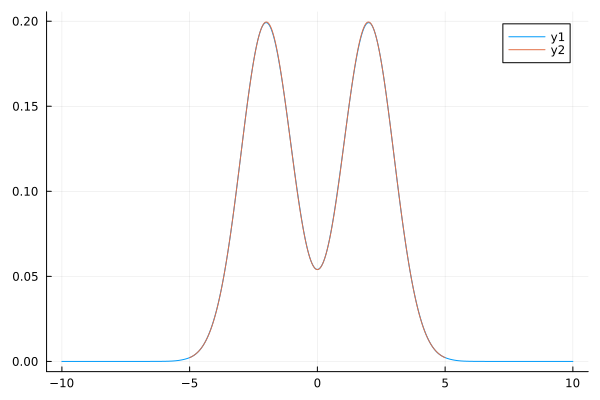

In [14]:
plot()
#plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
#plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol.val))/pi)
#plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol.nev_st.reals.val))/pi)
plot!(Float64.(real.((ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(ham_nev_sol.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [13]:
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
#savefig("two_peak.svg")

LoadError: UndefVarError: sol not defined